In [0]:
import matplotlib.pyplot as plt
import seaborn              #data visualization tools
from IPython import display #Data를 연속적으로 출력

import numpy as np
import tensorflow as tf
import os

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from tensorflow.keras.datasets.cifar100 import load_data

In [0]:
def plot_online(epoch, samples, size=1):
  cliped = np.clip(samples,0,255).astype(int)
  fig,ax = plt.subplots(ncols = len(cliped), figsize = (len(cliped)*size,size))
  no_ticks = dict(left='off', bottom='off', labelleft='off', labelbottom='off')
  
  ax[0].set_ylabel('Epoch {}'.format(epoch))
  
  for index ,sample in enumerate(cliped):
    ax[index].imshow(sample)
    ax[index].tick_params(axis='both', which='both', **no_ticks)
  display.display(fig)
  plt.close()

  
def next_batch(num, data):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]

    return np.asarray(data_shuffle)

In [0]:


def Encoder(xs):
  Channels = [64,32]
  
  with tf.variable_scope("Conv_Enc",reuse = tf.AUTO_REUSE):
    conv1 = tf.layers.conv2d(xs,Channels[0],kernel_size=5,strides=1,padding='SAME',activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(conv1,pool_size=[2,2],strides=2,padding='SAME')
    
    conv2 = tf.layers.conv2d(pool1,Channels[1],kernel_size=5,strides=1,padding='SAME',activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(conv2,pool_size=[2,2],strides=2,padding='SAME')
    
    output = pool2
    return output
    
    
def Decoder(encoded):
  Channels = [32,64,3]
  
  with tf.variable_scope("Conv_Dec", reuse = tf.AUTO_REUSE):
    deconv1 = tf.layers.conv2d_transpose(encoded,Channels[0],kernel_size = 5,strides = 2,padding='SAME',activation=tf.nn.relu) #7
    deconv2 = tf.layers.conv2d_transpose(deconv1,Channels[1],kernel_size = 5,strides = 2,padding='SAME',activation=tf.nn.relu) #14
    deconv3 = tf.layers.conv2d_transpose(deconv2,Channels[2],kernel_size = 1,strides = 1,padding='SAME',activation=tf.nn.relu) #28
    
    print(tf.shape(deconv3))
    return deconv3
    
def AutoEncoder(xs):
  encoded = Encoder(xs)
  output = Decoder(encoded)
  return output

In [26]:
tf.reset_default_graph()
data = tf.placeholder(tf.float32,shape = [None, 32,32,3],name = 'CIFAR100')

output = AutoEncoder(data)

loss = tf.reduce_mean(tf.pow(data-output,2))
optimize = tf.contrib.optimizer_v2.AdamOptimizer(0.001).minimize(loss)

Tensor("Conv_Dec/Shape:0", shape=(4,), dtype=int32)


In [27]:
(xs,ys),(xt,yt) = load_data()
print(xs.shape)

(50000, 32, 32, 3)


Epoch  0 , loss  23309.434


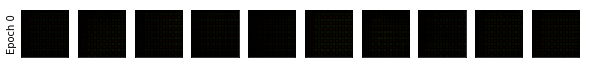

Epoch  1 , loss  591.72955


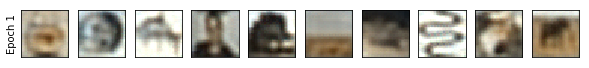

Epoch  2 , loss  400.95847


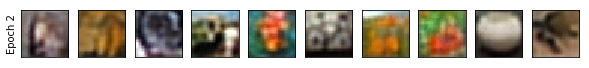

Epoch  3 , loss  383.0717


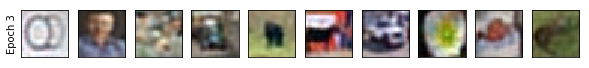

Epoch  4 , loss  212.9068


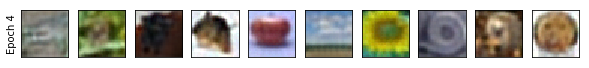

Epoch  5 , loss  264.39047


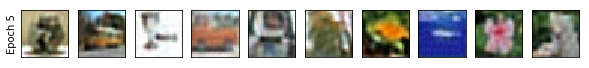

Epoch  6 , loss  251.37234


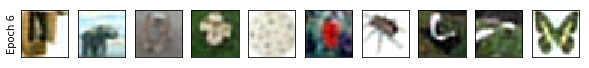

Epoch  7 , loss  254.6806


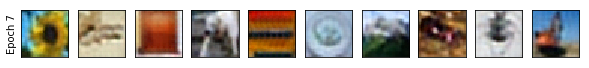

Epoch  8 , loss  169.64642


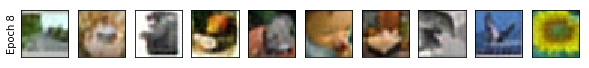

Epoch  9 , loss  224.3443


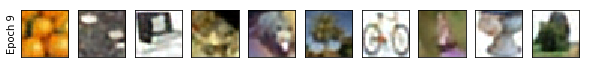

Epoch  10 , loss  187.90532


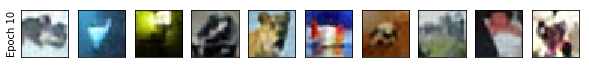

Epoch  11 , loss  224.93951


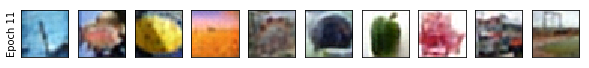

Epoch  12 , loss  309.7813


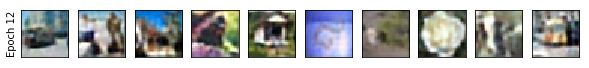

Epoch  13 , loss  199.8719


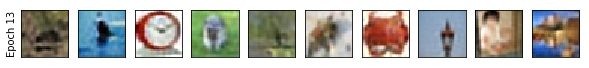

Epoch  14 , loss  200.8337


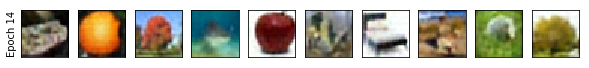

Epoch  15 , loss  234.08011


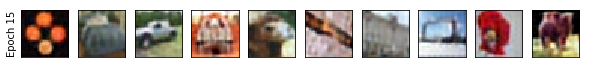

Epoch  16 , loss  162.33467


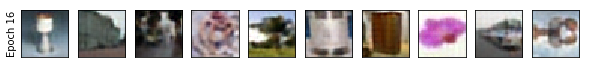

Epoch  17 , loss  153.96506


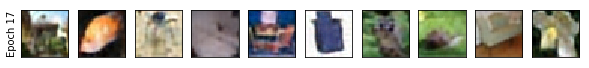

Epoch  18 , loss  190.15187


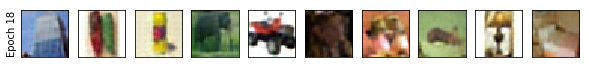

Epoch  19 , loss  200.14394


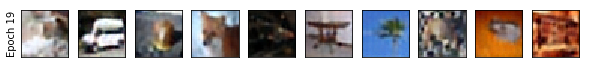

In [28]:

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(20):
    batch = next_batch(10, xt)
    
    feed = {data:batch}
    _loss, outputs = sess.run([loss,output],feed_dict=feed)

    print('Epoch ',epoch,', loss ',_loss)
    plot_online(epoch,outputs[0:10])
    
    for iter in range(200):
      batch = next_batch(128, xs)
      feed = {data:batch} #GPU 메모리 부족
      _ = sess.run(optimize,feed_dict=feed)